In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/eis-8-16.xlsx'


In [4]:
import pandas as pd
data = pd.read_excel(path)

In [6]:
data.head()

,freq. /Hz,|Z| /ohm,phi /deg,freq. /Hz.1,|Z| /ohm.1,phi /deg.1,freq. /Hz.2,|Z| /ohm.2,phi /deg.2,freq. /Hz.3,...,phi /deg.28,freq. /Hz.29,|Z| /ohm.29,phi /deg.29,freq. /Hz.30,|Z| /ohm.30,phi /deg.30,freq. /Hz.31,|Z| /ohm.31,phi /deg.31
0,3000000.0,7.495,-131.00,3000000.0,40.38,-29.13,3000000.0,87.54,-120.20,3000000.0,...,19.60,3000000.0,112.5,-68.56,3000000.0,30.01,-44.01,3000000.0,9.331,66.19
1,2572000.0,200.100,-56.28,2572000.0,325.50,-28.44,2572000.0,828.20,116.10,2572000.0,...,-161.20,2572000.0,348.3,-32.87,2572000.0,249.90,-33.04,2572000.0,216.600,69.57
2,2206000.0,334.000,-34.64,2206000.0,214.40,-60.24,2206000.0,304.10,10.64,2206000.0,...,-29.54,2206000.0,382.7,-31.17,2206000.0,342.50,-25.42,2206000.0,398.800,-50.72
3,1891000.0,497.200,-47.47,1891000.0,340.70,-89.14,1891000.0,192.50,-17.12,1891000.0,...,-58.91,1891000.0,426.1,-27.76,1891000.0,436.80,-47.54,1891000.0,311.400,-57.04
4,1622000.0,596.100,-67.35,1622000.0,597.90,-121.80,1622000.0,203.80,-82.83,1622000.0,...,-64.85,1622000.0,384.7,-63.14,1622000.0,447.20,-61.26,1622000.0,636.700,-84.70


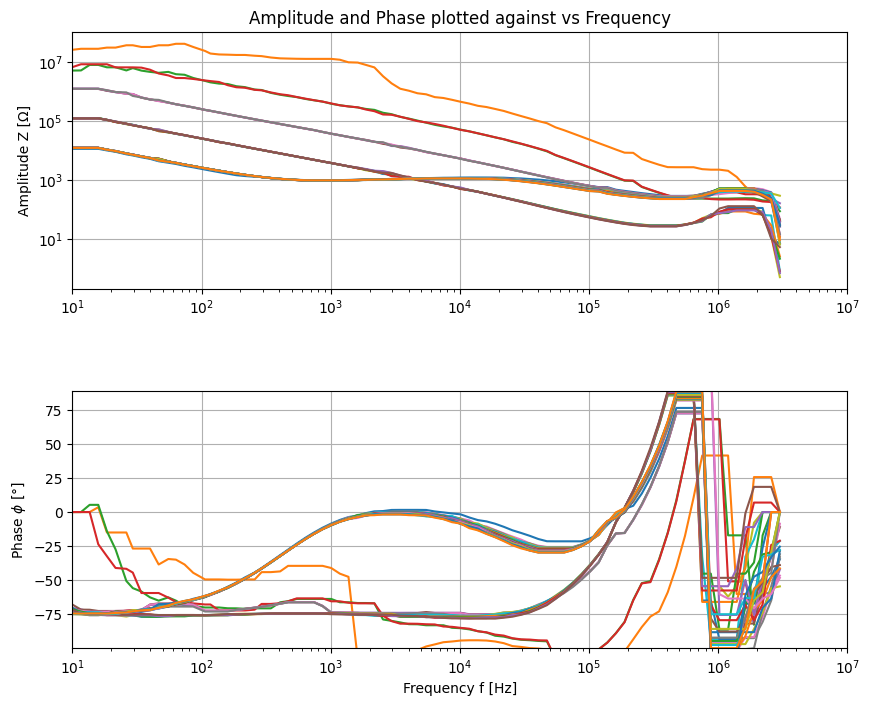

In [21]:
# Set max frequency and initialize index
f_max = 10000000
f_max_index = 0

# Extract the number of electrodes
n = data.shape[1]  # number of columns in the DataFrame
anzahl_elektroden = n // 3  # Integer division in Python

# Extract frequency column
frequenz = data.iloc[:, 0]  # Assuming the first column is the frequency

# Find the index where frequency exceeds max frequency
for i in range(len(frequenz)):
    if frequenz.iloc[i] > f_max:
        f_max_index = i
        break

# Remove data beyond the max frequency index
if f_max_index > 0:
    data = data.iloc[f_max_index:, :]

# Plot setup
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=False)
fig.subplots_adjust(hspace=0.4)

# Plot amplitude
for i in range(anzahl_elektroden):
    frequenz = data.iloc[:, 3 * i]
    amplitude = data.iloc[:, 1 + 3 * i]
    amplitude_filtered = medfilt(amplitude, kernel_size=7)

    axs[0].plot(frequenz, amplitude_filtered, label=f'Electrode {i + 1}')
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_xlim([10, f_max])
    axs[0].set_ylabel('Amplitude Z [Ω]')
    axs[0].grid(True)
    axs[0].set_title('Amplitude and Phase plotted against Frequency')

# Plot phase
for i in range(anzahl_elektroden):
    frequenz = data.iloc[:, 3 * i]
    phase = data.iloc[:, 2 + 3 * i]
    phase_filtered = medfilt(phase, kernel_size=7)


    axs[1].plot(frequenz, phase_filtered, label=f'Electrode {i + 1}')
    axs[1].set_xscale('log')
    axs[1].set_xlim([10, f_max])
    axs[1].set_ylim([phase_filtered.min(), phase_filtered.max()])
    axs[1].set_xlabel('Frequency f [Hz]')
    axs[1].set_ylabel(r'Phase $\phi$ [°]')
    axs[1].grid(True)


# Set plot background to white
fig.patch.set_facecolor('white')
plt.show()
